# Topic modelling

In this Notebook, we will try to find what people are talking about in a dataset of tweets from the f1. We will use Latent Dirichlet Allocation (LDA), an algorithm which finds topics, clusters of words which often are used together in different texts (in this case tweets). 

In [1]:
import pandas as pd

First, let's read the data file and filter on date, to limit the number of tweets (otherwise we have to wait to long later on).

In [2]:
df = pd.read_csv('F1_tweets.csv')
df=df[df['date']>'2021-11-22']
df.head()

Next we are going to create a matrix, in which all words used in the tweets, become columns and, all rows 0's and 1's depending if a tweet contains a word.

CountVectorizer is an algorithm which will clean our data by:
- removing stop_words like:  a, an, the, of, in, etc.
- min_df=2, removes all words which only occur twice in all tweets
- max_df = 0.70, removes all words which occur in 70% of all tweets

Next we fit the model and create the matrix: 
- <i>cv = cv.fit(text)</i>
- <i>cv_matrix = cv.transform(text)</i>

And finally we print it just to show what it looks like. The cv_matrix is however more efficient, leaving out all 0's which, as you can imagine, are a lot. We call this a sparse matrix.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
text= df['text']
cv = CountVectorizer(stop_words='english',min_df=2, max_df = 0.70)
cv = cv.fit(text) #We fit the model 
cv_matrix = cv.transform(text) # make a matrix

#not important for the topic modelling but let's print the matrix
pd.DataFrame(data=cv_matrix.toarray(),columns = cv.get_feature_names()).head()

C:\Users\danie\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,001,001s,01,02,04,05,06,07,...,小学校,小学生,撮り鉄,英会話,英会話教室,英語,鈴鹿市,高校,ꜰʀɪᴅᴀʏ,𝗧𝗛𝗘
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next we will create our LDA model. Since this is clustering an unsupervised method, we don't need to create a training and testing set.
We do have to determing the number of topics, for now we just choose 2.

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
no_topics = 2
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5,random_state=0)
lda = lda.fit(cv_matrix)

Now we can visualize the topics in wordclouds. To use the library wordcloud install it first: 
pip install wordcloud

Next load the libraries.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

First we create a function in which we take the most frequent words from a certain topic and visualize it.
No problem if you don't fully understand this function.

In [ ]:
feature= cv.get_feature_names()

def word_cloud(topic):
    # plt.figure(figsize = (8,6))
    topic_words = [feature[i] for i in lda.components_[topic].argsort()[-50:]]
    cloud = WordCloud(stopwords = STOPWORDS, background_color = 'white',
                      width=2500, height=1800).generate(" ".join(topic_words))

    print('\nWorcloud for topic:', topic, '\n')
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()


Worcloud for topic: 0 



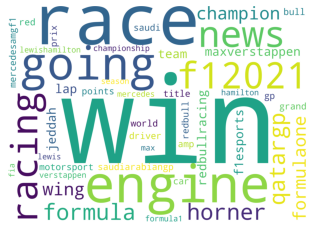


Worcloud for topic: 1 



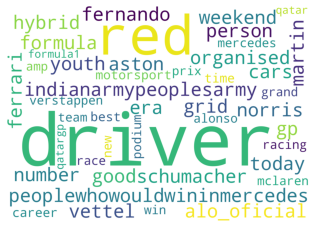

In [ ]:
word_cloud(0)
word_cloud(1)

Finally we chose to go for 2 topics, this however might not be the optimal number. To determine the optimal number we can use the cross validation technique: gridsearch. 

With Gridsearch you can test you model with different parameter settings. Since LDA is pretty slow, I only chose to test it on one parameter, the number of topics (n_components). There are however many more parameters to set.
Gridsearch will create 5 versions of your dataset and will test each number of topics with these 5 versions. So in total it will test 4 x 5= 20 models.

In [ ]:
from sklearn.model_selection import GridSearchCV

search_params = {
  'n_components': [2, 4, 6, 8]
}

lda = LatentDirichletAllocation(random_state=0)

# Try all of the options
gridsearch = GridSearchCV(lda, param_grid=search_params, n_jobs=-1, verbose=1)
gridsearch.fit(cv_matrix)

# What did we find?
print("Best Model's Params: ", gridsearch.best_params_)
print("Best Log Likelihood Score: ", gridsearch.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Model's Params:  {'n_components': 2}
Best Log Likelihood Score:  -143919.62856044588


As you can see the best number of topics seems to be 2.